In [1]:
import pandas as pd
from functools import partial
import multiprocessing as mp
from functools import partial

# df = pd.read_csv("about_us_second_round_with_additional_firms.csv", low_memory=False)
df = pd.read_csv("/Users/vijay/Documents/projects/research/takeda/miu-phrases/sp_2024/miu-website/company_website_second_round_with_additional_firms.csv", low_memory=False)

print("Opened CSV")

Opened CSV


In [2]:
# keywords = [
#     "made in america", "made in u.s.", "made in us", # made in usa and made in us overlap
#     "american made", "usa made", "u.s. made", "us made",
#     "buy american", "buy usa", "buy america",
#     "support america", "support usa", "support u.s.",
#     "patriot",
#     "choose american", "choose usa", "choose u.s.", "choose america",
#     "national pride",
#     "usa based", "america based", "american based", "us based", "u.s. based",
#     "usa produced", "america produced", "american produced", "us produced", "u.s. produced",
#     "american worker", "american job",
#     "veteran owned", "veteran founded", "founded by veteran",
#     "crafted in america", "crafted in u.s.", "crafted in us", # removed "crafted in the usa" due to overlap with crafted in the US
#     "america heritage", "america tradition", "america value",
#     "icon of america", "icon of usa", "icon of u.s.",
#     "america manufactur", "u.s. manufactur", "us manufactur"
# ]


# keywords = [
#     "abroad",
#     "ahn sung ki",
#     "appreciating renminbi",
#     "asean rok",
#     "asian",
#     "bahk byong won",
#     "beijing",
#     "burmese",
#     "cambodia laos burma",
#     "carmaker chery",
#     "chaebol conglomerates",
#     "changfeng motors",
#     "china quarantined",
#     "china textile",
#     "chinese",
#     "communist party plenum",
#     "communist regime",
#     "cross strait",
#     "cyclical downturns",
#     "delegate li junhua",
#     "domestic",
#     "dumpling poisoning",
#     "european",
#     "fledging democracies",
#     "foreigners",
#     "gaeseong industrial complex",
#     "gao hucheng",
#     "garment exporters",
#     "geumgang resort",
#     "global",
#     "government",
#     "guoqi",
#     "hainan airlines",
#     "hakka culture",
#     "hanoi",
#     "hansol paper",
#     "hardline stalinist",
#     "hcm city vietnam",
#     "hermit kingdom",
#     "hite brewery",
#     "hongkong",
#     "indo sino",
#     "indonesian",
#     "inflates exporters",
#     "intentionally oversupplying neighboring",
#     "inter korean",
#     "international",
#     "iranian",
#     "japanese militarism",
#     "kyobo life insurance",
#     "landlocked laos",
#     "liberalising",
#     "mainland",
#     "malaysian",
#     "maritime territorial disputes",
#     "mercantilist policies",
#     "mncs",
#     "mofat",
#     "multinational corporations",
#     "myanmar",
#     "nepalese",
#     "newly industrialising economies",
#     "nk nukes",
#     "nkorean nuke test",
#     "nonmarket economies",
#     "north koreans",
#     "occupied manchuria",
#     "officially pacifist",
#     "overseas",
#     "peoples republic",
#     "poisoned dumplings",
#     "protectionist pressures",
#     "pyongyang",
#     "reminbi",
#     "resolute countermeasures",
#     "restarted psychological warfare",
#     "retaliated militarily",
#     "revolutionary guard ballistic missiles",
#     "singaporean",
#     "sino dprk",
#     "sino japanese",
#     "sk telekom",
#     "sohn kyung shik",
#     "south korea hyundai",
#     "speak fluent mandarin",
#     "taipei taiwanese",
#     "taishang",
#     "taiwanese chipmakers",
#     "tangun trading",
#     "thai",
#     "tiananmen dissident",
#     "tourism organization",
#     "tradeables sector",
#     "transnational corporations",
#     "undervalued renminbi",
#     "venetian macao casino resort",
#     "vietnamese shoemakers",
#     "vinomotor",
#     "wartime militarism",
#     "yuan denominated",
# ]

# keywords =  [
#     "agricultural",
#     "agroforestry fisheries",
#     "agroprocessing industries",
#     "attracting fdis",
#     "brownfields redevelopment",
#     "busineses",
#     "business",
#     "challenges abound",
#     "chance",
#     "community",
#     "continually innovate",
#     "creates virtuous circle",
#     "demographic trends",
#     "disciplined acquisitive",
#     "diversification",
#     "diversifying geographically",
#     "easylearning",
#     "economy",
#     "economic",
#     "economy",
#     "engage association memebrs",
#     "engender loyalty",
#     "entrepeneurial",
#     "entrepeneurship",
#     "entrepreneurial",
#     "excellently positioned",
#     "expansion",
#     "fosters entrepreneurship",
#     "growth",
#     "grwoth",
#     "highly leverageable",
#     "highmark exerts",
#     "holistic overview",
#     "ideally positioned",
#     "incorporating barter",
#     "incurring debt",
#     "iniatives",
#     "innovation",
#     "internships apprenticeships",
#     "intrapreneurs",
#     "intresting news",
#     "invent tomorrow",
#     "job shadowing",
#     "lambert martelle",
#     "loan origination volumes",
#     "local",
#     "locational advantages",
#     "multiproduct bundles",
#     "mutually beneficial partnerships",
#     "mutually beneficial relationship",
#     "noninflationary",
#     "opportunity",
#     "opportunities",
#     "potential",
#     "preferential treatment",
#     "priority privilege",
#     "profi tability",
#     "profitability",
#     "profitabilty",
#     "quantifiable roi",
#     "rapidly expanding",
#     "reskilling",
#     "revitalise",
#     "restock depleted shelves",
#     "revenue",
#     "revitalizing downtowns",
#     "shareowner value",
#     "skilled workforces",
#     "streamlined workflows",
#     "success",
#     "surgeon lemole",
#     "sustainabilty",
#     "sustainable",
#     "synergy",
#     "the influence game lobbyists",
#     "the long term",
#     "thrifty habits",
#     "to expand",
#     "tremendous",
#     "treasuries steady",
#     "trickledown effect",
#     "underpenetrated",
#     "unexplored basins",
#     "unlevered balance sheet",
#     "unpenetrated",
#     "unserved underserved",
#     "untapped",
#     "upbeat outlooks",
#     "upscale midscale",
#     "upturn",
#     "value proposition",
#     "valueadded",
#     "varian semiconductor reliance",
#     "vending operators",
#     "vitalization",
#     "wellpositioned",
#     "widespread joblessness",
#     "willhelp",
#     "winwin situation",
#     "workforce plus",
# ]

keywords = [
    "administration",
    "airbrushing",
    "alaska",
    "alliance",
    "americas",
    "analytical",
    "approved",
    "audit",
    "authorities",
    "authority",
    "authorized",
    "bullion",
    "canada",
    "canadian",
    "capital",
    "centralized",
    "china",
    "citizenship",
    "conflict",
    "countries",
    "direct",
    "diverse",
    "diversified",
    "diversity",
    "domestic",
    "economic",
    "economy",
    "efforts",
    "emerging",
    "enforces",
    "environmental",
    "europe",
    "export",
    "fairness",
    "farmers",
    "federal",
    "financial",
    "firms",
    "foreign",
    "fostered",
    "franchisees",
    "fraud",
    "gateways",
    "global",
    "governance",
    "governing",
    "government",
    "illinois",
    "implementation",
    "import",
    "independent",
    "infrastructure",
    "inhumane",
    "international",
    "jobs",
    "labeling",
    "law",
    "legislation",
    "licensing",
    "outlying",
    "outreach",
    "overseas",
    "packaging",
    "parliamentary",
    "personnel",
    "political",
    "references",
    "regional",
    "regions",
    "regulation",
    "regulatory",
    "relations",
    "renewable",
    "representative",
    "reputable",
    "requirements",
    "respected",
    "responsible",
    "rural",
    "scarcity",
    "sourced",
    "sources",
    "sourcing",
    "specification",
    "specifiers",
    "sponsors",
    "standards",
    "state",
    "strategic",
    "strictest",
    "taiwanese",
    "trades",
    "trusted",
    "vendors",
    "violence",
    "warehouses",
    "wastewater",
    "wholesalers",
    "wisconsin",
    "worldwide",
]

In [3]:
df.drop(df.columns[:14], axis=1, inplace=True)
df = df.loc[:, ~df.columns.str.contains('\.')]
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/rw/s7c9z30x7fj_2gcngv0yhv6w0000gn/T/ipykernel_81536/305825213.py:2: SyntaxWarning: invalid escape sequence '\.'
  df = df.loc[:, ~df.columns.str.contains('\.')]


,2023-10,2023-09,2023-08,2023-07,2023-06,2023-05,2023-04,2023-03,2023-02,2023-01,...,1997-07,1997-06,1997-05,1997-04,1997-03,1997-02,1997-01,1996-12,1996-11,1996-10
0,NaN,NaN,NaN,NaN,NaN,NaN,\nGifts for Men | 11 Industries | Gentleman's ...,\nGifts for Men | 11 Industries | Gentleman's ...,\nGifts for Men | 11 Industries | Gentleman's ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,\nDistillery | 11 Wells Distillery | Saint Pau...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",NaN,NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",NaN,"14th Rose - Handbags, Purses, Woman's Bags\n F...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,\nHome - Regal Ware\nWho We Are\nWhy We Work\n...,\nHome - Regal Ware\nWho We Are\nWhy We Work\n...,\nRegal Ware | Enriching Life by Bringing Fami...,NaN,NaN,\nRegal Ware | Enriching Life by Bringing Fami...,NaN,\nRegal Ware | Enriching Life by Bringing Fami...,...,NaN,NaN,NaN,NaN,NaN,NaN,"\nWelcome to Regal Ware, Inc.\nA global leader...","\nWelcome to Regal Ware, Inc.\nA global leader...",NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\nCustom Swim Parkas and Wholesale Fleece Jack...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5189, 325)

In [5]:
columns = list(df.columns)

In [6]:
def count_keywords_in_cell(cell, keywords):
    return sum(1 if keyword.lower() in str(cell).lower() else 0 for keyword in keywords)

def calculate_total_counts(df, columns, keywords):
    total_counts_df = pd.DataFrame(index=df.index, columns=columns, dtype=int).fillna(0)
    
    for index, row in df.iterrows():
        previous_count = 0  # Initialize the previous count
        for col_idx, col in enumerate(reversed(columns)):
            cell_value = row[col]
            current_count = count_keywords_in_cell(cell_value, keywords)
            
            # If the current count is zero and the previous count is greater than zero, use the previous count
            if current_count == 0 and previous_count > 0:
                total_counts_df.at[index, columns[len(columns) - 1 - col_idx]] = previous_count
            else:
                total_counts_df.at[index, columns[len(columns) - 1 - col_idx]] = current_count
                previous_count = current_count  # Update previous count
    
    return total_counts_df

In [7]:
total_counts_df = calculate_total_counts(df, columns, keywords)

In [8]:
total_counts_df

,2023-10,2023-09,2023-08,2023-07,2023-06,2023-05,2023-04,2023-03,2023-02,2023-01,...,1997-07,1997-06,1997-05,1997-04,1997-03,1997-02,1997-01,1996-12,1996-11,1996-10
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5184,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5185,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5186,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5187,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
document_counts = [0] * len(columns) # Initialize a list to hold the count of documents for each year.

for row in df.itertuples(index=False):# Iterate over each row in the DataFrame.
    previous_count = 0 # Initialize the previous count to 0 for the first iteration.

    for idx in reversed(range(len(columns))):    # Iterate over the columns in reverse order to update the document count.
        value = row[idx] # Access the value using the appropriate index for itertuples() output.
        
        # Check if the current cell has a document (non-NaN and not an empty string).
        if pd.isna(value) or isinstance(value, int):
            document_counts[idx] += previous_count # If there's a document, increment the count for the year and set the previous count to 1.
        else:
            document_counts[idx] += 1 # If there's no document, add the previous year's count to this year's count.
            previous_count = 1 # We have found a document so previous should never be 0



total_documents = sum(document_counts)
document_count_sum = total_documents
# Print the total number of documents.
print(total_documents)

878379


In [10]:
# Extract the count values for the term frequency IDF portion
term_count = {}

# def count_term_existence(keyword):
#     import pandas as pd
#     print("Processing keyword: ", keyword)
#     # Columns indicating years
#     columns = list(df.columns)
#     term_existence = [0] * len(columns)

#     for row in df.itertuples(index=True): # For each website
#         previous_value = 0 # Track the previous value
#         for column in range(len(columns) - 1, -1, -1): # Go from the earliest time to the latest time.
#             if pd.isna(row[column]) or type(row[column]) == int: # Is the value a number or showing a null value?
#                 term_existence[column] += previous_value # Add the most recent value
#             else:
#                 if keyword in row[column].lower(): # is the keyword in the lowercased version of the text?
#                     term_existence[column] += 1 # Yes? then add 1 to the value for this year
#                     previous_value = 1 # Yes? Set the previous value to 1
#                 else:
#                     term_existence[column] += previous_value # Keyword isn't there? If it was there in last year(s), include it this year. 

#     return {keyword: sum(term_existence)} # Sum the value over all of the different years


def count_term_existence(keyword):
    print(f"Processing keyword: {keyword}")
    term_existence = [0] * len(columns)
    
    for index, row in df.iterrows():
        previous_total_count = 0  # Initialize the total count for all keywords in the previous cell
        for col_idx, col in enumerate(reversed(columns)):
            cell_value = row[col]
            current_total_count = total_counts_df.at[index, col]

            if current_total_count == 0 and previous_total_count > 0:
                # If total count drops to 0 but was higher before, carry over the previous value
                term_existence[len(columns) - 1 - col_idx] += 1
            elif pd.isna(cell_value) or isinstance(cell_value, int):
                term_existence[len(columns) - 1 - col_idx] += 0
            else:
                if keyword in cell_value.lower():
                    term_existence[len(columns) - 1 - col_idx] += 1
                else:
                    term_existence[len(columns) - 1 - col_idx] += 0

            if current_total_count == 0 and previous_total_count > 0:
                previous_total_count = previous_total_count
            else:
                previous_total_count = current_total_count  # Update the total count for the next iteration

    return {keyword: sum(term_existence)}


In [11]:
results = [count_term_existence(keyword) for keyword in keywords]

term_count = {}
for result in results:
    term_count.update(result)

print(term_count)

Processing keyword: administration
Processing keyword: airbrushing
Processing keyword: alaska
Processing keyword: alliance
Processing keyword: americas
Processing keyword: analytical
Processing keyword: approved
Processing keyword: audit
Processing keyword: authorities
Processing keyword: authority
Processing keyword: authorized
Processing keyword: bullion
Processing keyword: canada
Processing keyword: canadian
Processing keyword: capital
Processing keyword: centralized
Processing keyword: china
Processing keyword: citizenship
Processing keyword: conflict
Processing keyword: countries
Processing keyword: direct
Processing keyword: diverse
Processing keyword: diversified
Processing keyword: diversity
Processing keyword: domestic
Processing keyword: economic
Processing keyword: economy
Processing keyword: efforts
Processing keyword: emerging
Processing keyword: enforces
Processing keyword: environmental
Processing keyword: europe
Processing keyword: export
Processing keyword: fairness
Pr

In [12]:
import math

def generate_final_value_by_year(data):
    keyword, term_existence = data

    print("Processing keyword: ", keyword)
    adjusted_keyword_count = [0] * len(columns)

    if term_existence == 0: # Skip over if this term wasn't counted in any of the years
        return {keyword: adjusted_keyword_count}
    
    for row in df.itertuples(index=True):
        previous_value = 0
        for column in range(len(columns) - 1, -1, -1): # Iterate from least recent to most recent
            if pd.isna(row[column]) or type(row[column]) == int: # Does the current value here not exist?
                adjusted_keyword_count[column] += previous_value # Add in the previous value instead
            else:

                keyword_count = row[column].lower().count(keyword) # This is the term frequency within this document (for not using TF-IDF)
                value = keyword_count # No changes to the value here! (for not using TF-IDF)

                if keyword_count > 0 or value > previous_value: # Is the value greater? Does the keyword count exist
                    adjusted_keyword_count[column] += value # Increment by the value we just got
                    previous_value = value # Set previous value
                else: 
                    adjusted_keyword_count[column] += previous_value # Just use the previous value

    return {keyword: adjusted_keyword_count}

In [13]:
results = [generate_final_value_by_year((keyword, term_count[keyword])) for keyword in keywords]

tf_idf_total = {}
for result in results:
    tf_idf_total.update(result)

print(tf_idf_total)

Processing keyword:  administration
Processing keyword:  airbrushing
Processing keyword:  alaska
Processing keyword:  alliance
Processing keyword:  americas
Processing keyword:  analytical
Processing keyword:  approved
Processing keyword:  audit
Processing keyword:  authorities
Processing keyword:  authority
Processing keyword:  authorized
Processing keyword:  bullion
Processing keyword:  canada
Processing keyword:  canadian
Processing keyword:  capital
Processing keyword:  centralized
Processing keyword:  china
Processing keyword:  citizenship
Processing keyword:  conflict
Processing keyword:  countries
Processing keyword:  direct
Processing keyword:  diverse
Processing keyword:  diversified
Processing keyword:  diversity
Processing keyword:  domestic
Processing keyword:  economic
Processing keyword:  economy
Processing keyword:  efforts
Processing keyword:  emerging
Processing keyword:  enforces
Processing keyword:  environmental
Processing keyword:  europe
Processing keyword:  expor

In [14]:
print(tf_idf_total[keywords[0]])

[227, 227, 225, 223, 222, 220, 219, 219, 217, 215, 218, 217, 216, 215, 213, 213, 214, 213, 209, 208, 207, 204, 204, 203, 205, 204, 204, 203, 202, 203, 201, 199, 199, 198, 198, 200, 197, 198, 197, 196, 193, 193, 194, 185, 182, 182, 182, 180, 176, 176, 175, 175, 175, 174, 173, 171, 171, 171, 171, 172, 171, 171, 171, 171, 169, 169, 158, 158, 158, 158, 158, 155, 155, 155, 155, 154, 152, 149, 147, 143, 143, 145, 143, 141, 138, 138, 141, 140, 140, 135, 134, 136, 136, 135, 134, 134, 127, 124, 124, 124, 123, 122, 120, 120, 120, 119, 118, 118, 119, 118, 117, 117, 116, 116, 116, 116, 115, 115, 115, 115, 115, 115, 115, 115, 112, 111, 110, 109, 109, 108, 108, 108, 107, 105, 105, 106, 105, 104, 102, 99, 104, 102, 102, 102, 103, 97, 96, 93, 93, 93, 92, 92, 92, 92, 92, 89, 86, 82, 82, 82, 82, 83, 82, 78, 77, 77, 77, 77, 77, 76, 74, 74, 74, 74, 77, 77, 76, 74, 71, 70, 68, 66, 66, 66, 64, 64, 64, 64, 63, 63, 62, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 60, 60, 58, 58, 57, 57,

In [15]:
year_sums = [0] * len(columns)
for keyword in keywords: # Going through all of the keywords
    if type(tf_idf_total[keyword]) == int: # This is a redundant invalid check
        continue
    for column in range(len(columns)): # Go through all of the years
        year_sums[column] += tf_idf_total[keyword][column] # Adding up all the sums per year 
    
for column in range(len(columns)): 
    # print(column)
    # print(document_count[column])   
    # print(year_sums[column], document_count[column])

    try:
        year_sums[column] /= document_counts[column]
    except ZeroDivisionError:
        year_sums[column] /= 1
print(year_sums[:10])

[12.393020719738278, 12.403841955904824, 12.318042813455657, 12.282589676290463, 12.25262467191601, 12.248522005693015, 12.16969962727472, 12.061909989023052, 12.070704845814978, 11.988092613009924]


In [16]:
print(df.columns.tolist())

['2023-10', '2023-09', '2023-08', '2023-07', '2023-06', '2023-05', '2023-04', '2023-03', '2023-02', '2023-01', '2022-12', '2022-11', '2022-10', '2022-09', '2022-08', '2022-07', '2022-06', '2022-05', '2022-04', '2022-03', '2022-02', '2022-01', '2021-12', '2021-11', '2021-10', '2021-09', '2021-08', '2021-07', '2021-06', '2021-05', '2021-04', '2021-03', '2021-02', '2021-01', '2020-12', '2020-11', '2020-10', '2020-09', '2020-08', '2020-07', '2020-06', '2020-05', '2020-04', '2020-03', '2020-02', '2020-01', '2019-12', '2019-11', '2019-10', '2019-09', '2019-08', '2019-07', '2019-06', '2019-05', '2019-04', '2019-03', '2019-02', '2019-01', '2018-12', '2018-11', '2018-10', '2018-09', '2018-08', '2018-07', '2018-06', '2018-05', '2018-04', '2018-03', '2018-02', '2018-01', '2017-12', '2017-11', '2017-10', '2017-09', '2017-08', '2017-07', '2017-06', '2017-05', '2017-04', '2017-03', '2017-02', '2017-01', '2016-12', '2016-11', '2016-10', '2016-09', '2016-08', '2016-07', '2016-06', '2016-05', '2016-04'

325 [Timestamp('2023-10-01 00:00:00'), Timestamp('2023-09-01 00:00:00'), Timestamp('2023-08-01 00:00:00')]


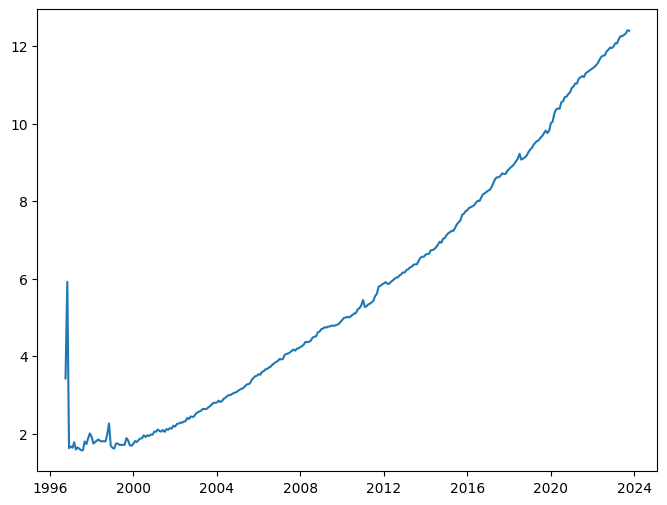

In [17]:
columns = pd.to_datetime(list(df.columns)) # Going back to the original dataframe and getting the columns from there
columns = list(columns) # Turning it from Pandas format to list format

print(len(columns), columns[:3])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(columns, list(year_sums)) # Plotting it!

In [18]:
company_website_year_sums = year_sums

In [19]:
company_website_year_sums_columns = columns

In [20]:
about_us_year_sums = year_sums

In [21]:
about_us_year_sums_columns = columns

In [22]:
about_us_year_sums

[12.393020719738278,
 12.403841955904824,
 12.318042813455657,
 12.282589676290463,
 12.25262467191601,
 12.248522005693015,
 12.16969962727472,
 12.061909989023052,
 12.070704845814978,
 11.988092613009924,
 11.945683373813203,
 11.957512724053995,
 11.900376355988488,
 11.857395925597874,
 11.757978723404255,
 11.751497670290659,
 11.717840479893358,
 11.648065807025345,
 11.558325912733748,
 11.501226309921963,
 11.46014735432016,
 11.423944605762788,
 11.394766271527622,
 11.360718294051628,
 11.32965796579658,
 11.2967305524239,
 11.199367088607595,
 11.222473434320596,
 11.187952898550725,
 11.158193372673626,
 11.030475324084604,
 11.031912468657397,
 10.957704618198445,
 10.919184981684982,
 10.803804721521889,
 10.762101399403534,
 10.691881918819188,
 10.684332330479055,
 10.57422056770591,
 10.548280734809232,
 10.381401935331603,
 10.388020833333334,
 10.36208125445474,
 10.263571428571428,
 10.049332697807436,
 10.01217183770883,
 9.816185247075675,
 9.754306220095694,
 9.

In [23]:
company_website_year_sums

[12.393020719738278,
 12.403841955904824,
 12.318042813455657,
 12.282589676290463,
 12.25262467191601,
 12.248522005693015,
 12.16969962727472,
 12.061909989023052,
 12.070704845814978,
 11.988092613009924,
 11.945683373813203,
 11.957512724053995,
 11.900376355988488,
 11.857395925597874,
 11.757978723404255,
 11.751497670290659,
 11.717840479893358,
 11.648065807025345,
 11.558325912733748,
 11.501226309921963,
 11.46014735432016,
 11.423944605762788,
 11.394766271527622,
 11.360718294051628,
 11.32965796579658,
 11.2967305524239,
 11.199367088607595,
 11.222473434320596,
 11.187952898550725,
 11.158193372673626,
 11.030475324084604,
 11.031912468657397,
 10.957704618198445,
 10.919184981684982,
 10.803804721521889,
 10.762101399403534,
 10.691881918819188,
 10.684332330479055,
 10.57422056770591,
 10.548280734809232,
 10.381401935331603,
 10.388020833333334,
 10.36208125445474,
 10.263571428571428,
 10.049332697807436,
 10.01217183770883,
 9.816185247075675,
 9.754306220095694,
 9.

In [24]:
# Create a DataFrame
df_final = pd.DataFrame({
    'year_month_day': about_us_year_sums_columns,
    'company_website_year_sums': company_website_year_sums,
    'about_us_year_sums': about_us_year_sums
})

# Add the combined column
df_final['combined'] = df_final['company_website_year_sums'] + df_final['about_us_year_sums']

print(df_final)

    year_month_day  company_website_year_sums  about_us_year_sums   combined
0       2023-10-01                  12.393021           12.393021  24.786041
1       2023-09-01                  12.403842           12.403842  24.807684
2       2023-08-01                  12.318043           12.318043  24.636086
3       2023-07-01                  12.282590           12.282590  24.565179
4       2023-06-01                  12.252625           12.252625  24.505249
..             ...                        ...                 ...        ...
320     1997-02-01                   1.643725            1.643725   3.287449
321     1997-01-01                   1.675000            1.675000   3.350000
322     1996-12-01                   1.632035            1.632035   3.264069
323     1996-11-01                   5.916667            5.916667  11.833333
324     1996-10-01                   3.428571            3.428571   6.857143

[325 rows x 4 columns]


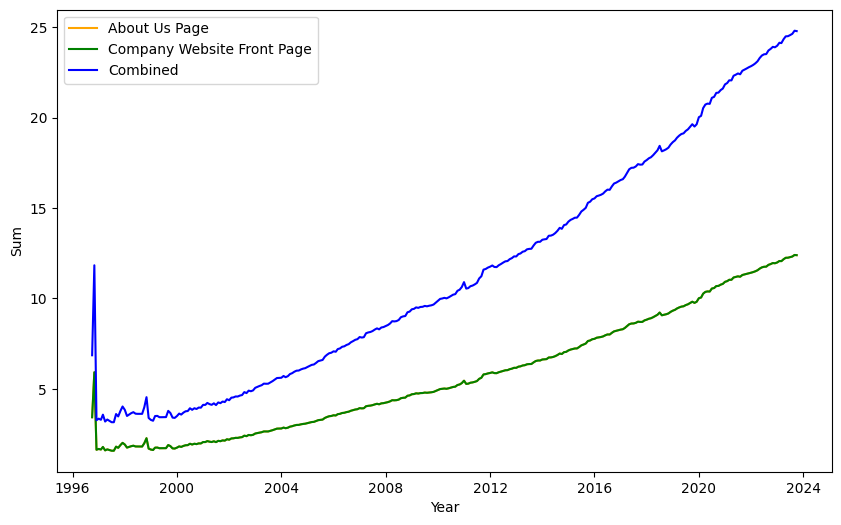

In [25]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot each series
plt.plot(df_final['year_month_day'], df_final['about_us_year_sums'], label='About Us Page', color='orange')
plt.plot(df_final['year_month_day'], df_final['company_website_year_sums'], label='Company Website Front Page', color='green')
plt.plot(df_final['year_month_day'], df_final['combined'], label='Combined', color='blue')

# Set labels for x and y axes
plt.xlabel('Year')
plt.ylabel('Sum')

# Add legend
plt.legend()

# Show plot
plt.show()

In [26]:
df_final.to_csv("C:\\Users\\theal\\research\\plot_recreation\\tf_idf_values.csv", index=False)